In [0]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline

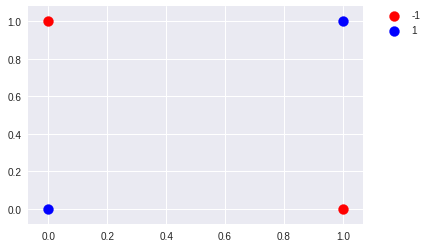

In [0]:
x = np.array([[1, 1], [0, 0], [1, 0], [0, 1]])
y = np.array([[1], [1], [-1], [-1]])
y_oneHot = np.array([[1,0],[1,0],[0,1],[0,1]])
color = ["blue", "red"]
sns.set_palette("husl")
cdict = {-1: 'red', 1: 'blue'}
#plt.scatter(np.transpose(x)[0], np.transpose(x)[1], c = [i for i in y.T[0]], cmap = cm.Paired, label = [i for i in y.T[0]])
#plt.legend(loc='upper left')
fig, ax = plt.subplots()
for g in np.unique([i for i in y.T[0]]):
    ix = np.where([i for i in y.T[0]] == g)
    ax.scatter(np.transpose(x)[0][ix], np.transpose(x)[1][ix], c = cdict[g], label = g, s = 100)

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [0]:
def tanh(x):
    return (1.0 - np.exp(-2*x))/(1.0 + np.exp(-2*x))

def tanh_derivative(x):
    return (1 + tanh(x))*(1 - tanh(x))

In [0]:
num_examples = x.shape[0] # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
learningRate = 0.01 # learning rate for gradient descent

In [0]:
def getLoss(model):
    W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], model['b3']
    # Forward propagation to calculate predictions
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    a2 = np.tanh(z2)
    z3 = a2.dot(W3) + b3
    output = sigmoid(z3)
    
    #print model
    
    loss = -(1.0/x.shape[0]) * np.sum(y_oneHot*np.log(output) + (np.array([1,1])-y_oneHot)*np.log(np.array([1,1])-output))
    
    #correct_logoutput = -np.log(output[range(x.shape[0]), y])
    #loss = np.sum(correct_logoutput)
    
    return loss

In [0]:
def predict(model, x):
    W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], model['b3']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    a2 = np.tanh(z2)
    z3 = a2.dot(W3) + b3
    output = sigmoid(z3)
    
    prediction = np.array([])
    for i in output:
      if i[0] > i[1]:
        prediction = np.append(prediction, [1])
      else:
        prediction = np.append(prediction, [-1])
        
    return prediction

In [0]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigmoidDerivative(x):
  return (1-1/(1+np.exp(-x)))*(1/(1+np.exp(-x)))

In [0]:
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(x, y_oneHot, nn_hdim1, nn_hdim2, num_passes=20000, print_loss=False):
     
    # Initialize the parameters to random values
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim1) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim1))
    
    W2 = np.random.randn(nn_hdim1, nn_hdim2) / np.sqrt(nn_hdim1)
    b2 = np.zeros((1, nn_hdim2))
    
    W3 = np.random.randn(nn_hdim2, nn_output_dim) / np.sqrt(nn_hdim2)
    b3 = np.zeros((1, nn_output_dim))
 
    model = {}
     
    # Gradient descent. For each batch
    for i in range(0, num_passes):     
      
      s = np.arange(x.shape[0])
      
      # Forward propagation
      z1 = x.dot(W1) + b1
      a1 = np.tanh(z1)
      z2 = a1.dot(W2) + b2
      a2 = np.tanh(z2)
      z3 = a2.dot(W3) + b3
      output = sigmoid(z3)
      

      # Backpropagation
      dW3 = a2.T.dot((output-y_oneHot)*sigmoidDerivative(output))
      db3 = (output-y_oneHot)*sigmoidDerivative(output)
      db3 = np.sum(db3, axis = 0)/x.shape[0]
      
      
      #print dW3.shape
      #print (db3).shape


      dW2 = a1.T.dot(((output-y_oneHot)*sigmoidDerivative(output)).dot(W3.T)*(1 - np.power(a2, 2)))           
      db2 = ((output-y_oneHot)*sigmoidDerivative(output)).dot(W3.T)*(1 - np.power(a2, 2))
      db2 = np.sum(db2, axis = 0)/x.shape[0]
      #print dW2.shape
      #print db2.shape

      dW1 = x.T.dot((((output-y_oneHot)*sigmoidDerivative(output)).dot(W3.T)*(1 - np.power(a2, 2))).dot(W2.T) * (1 - np.power(a1, 2)))
      db1 = (((output-y_oneHot)*sigmoidDerivative(output)).dot(W3.T)*(1 - np.power(a2, 2))).dot(W2.T) * (1 - np.power(a1, 2))
      db1 = np.sum(db1, axis = 0)/x.shape[0]
      #x.T.dot(((((output-y)*sigmoidDerivative(output).dot(W3.T))*(1 - np.power(a2, 2))).dot(W2.T)) * (1 - np.power(a1, 2)))

      #print dW1.shape
      #print db1.shape


      # Gradient descent parameter update
      W3 -= learningRate * dW3
      b3 -= learningRate * db3
      W2 -= learningRate * dW2
      b2 -= learningRate * db2
      W1 -= learningRate * dW1
      b1 -= learningRate * db1

      # Assign new parameters to the model
      model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3': W3, 'b3': b3}

      # Optionally print the loss.
      if print_loss and i % 1000 == 0:
        print("Loss after iteration %i: %f" %(i, getLoss(model)))
     
    return model

In [0]:
model = build_model(x, y_oneHot,4, 4, print_loss=True)
prediction = predict(model, np.array([[1,0], [0,1],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]))
W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], model['b3']
#print W1.shape

print(prediction)

Loss after iteration 0: 1.498276
Loss after iteration 1000: 1.107158
Loss after iteration 2000: 0.817297
Loss after iteration 3000: 0.315049
Loss after iteration 4000: 0.127787
Loss after iteration 5000: 0.072438
Loss after iteration 6000: 0.048706
Loss after iteration 7000: 0.035984
Loss after iteration 8000: 0.028195
Loss after iteration 9000: 0.022991
Loss after iteration 10000: 0.019298
Loss after iteration 11000: 0.016555
Loss after iteration 12000: 0.014448
Loss after iteration 13000: 0.012782
Loss after iteration 14000: 0.011438
Loss after iteration 15000: 0.010331
Loss after iteration 16000: 0.009407
Loss after iteration 17000: 0.008624
Loss after iteration 18000: 0.007954
Loss after iteration 19000: 0.007374
[-1. -1.  1.  1.  1.  1.  1.  1.]


In [0]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = x[:, 0].min()-0.05, x[:, 0].max()+0.05
    y_min, y_max = x[:, 1].min()-0.05, x[:, 1].max()+0.05

    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    #print(xx.shape)
    
    # Predict the function value for the whole gid
    #Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    #print np.c_[xx.ravel(), yy.ravel()][:4]
    
    #for i in range (1, 10000):
      #print pred_func(np.c_[xx.ravel(), yy.ravel()][i*4:i*4+4])
      #Z =  np.append(Z,pred_func(np.c_[xx.ravel(), yy.ravel()][i*4:i*4+4]).T[0])
      
    #print(Z)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    #plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    for g in np.unique([i for i in y.T[0]]):
        ix = np.where([i for i in y.T[0]] == g)
        ax.scatter(np.transpose(x)[0][ix], np.transpose(x)[1][ix], c = cdict[g], label = g, s = 100)

    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.show
    #plt.scatter(x[:, 0], x[:, 1], c=[i for i in y.T[0]], cmap=cm.Spectral)

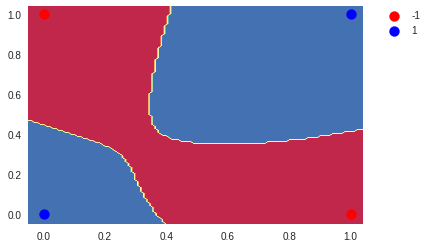

In [0]:
plot_decision_boundary(lambda x: predict(model, x))

In [0]:
def predictNoise(sigma, x, y_oneHot):
  mean = np.array([1,1])
  cov = np.array([[sigma, 0], [0, sigma]])
  newPoints = np.random.multivariate_normal(mean, cov, 5)
  x = np.vstack((x, newPoints))
  for i in range (5):
    y_oneHot = np.vstack((y_oneHot, [1,0]))
  
  mean = np.array([0,0])
  newPoints = np.random.multivariate_normal(mean, cov, 5)
  x = np.vstack((x, newPoints))
  for i in range (5):
    y_oneHot = np.vstack((y_oneHot, [1,0]))
  
  mean = np.array([1,0])
  newPoints = np.random.multivariate_normal(mean, cov, 5)
  x = np.vstack((x, newPoints))
  for i in range (5):
    y_oneHot = np.vstack((y_oneHot, [0,1]))
  
  mean = np.array([0,1])
  newPoints = np.random.multivariate_normal(mean, cov, 5)
  x = np.vstack((x, newPoints))
  for i in range (5):
    y_oneHot = np.vstack((y_oneHot, [0,1]))

  modelNoise = build_model(x, y_oneHot,4, 4, print_loss=True)

  plot_decision_boundary(lambda x: predict(modelNoise, x))
  return modelNoise

Loss after iteration 0: 1.496648
Loss after iteration 1000: 0.482900
Loss after iteration 2000: 0.058705
Loss after iteration 3000: 0.008087
Loss after iteration 4000: 0.003183
Loss after iteration 5000: 0.001810
Loss after iteration 6000: 0.001203
Loss after iteration 7000: 0.000867
Loss after iteration 8000: 0.000656
Loss after iteration 9000: 0.000511
Loss after iteration 10000: 0.000405
Loss after iteration 11000: 0.000326
Loss after iteration 12000: 0.000266
Loss after iteration 13000: 0.000221
Loss after iteration 14000: 0.000187
Loss after iteration 15000: 0.000163
Loss after iteration 16000: 0.000145
Loss after iteration 17000: 0.000134
Loss after iteration 18000: 0.000128
Loss after iteration 19000: 0.000127


{'W1': array([[ 5.80158084,  1.04336963,  2.04503679,  5.79627351],
        [ 4.13371605, -1.18197979,  1.17079137, -3.31167853]]),
 'W2': array([[-1.34830744, -0.43223582, -0.65283212,  3.51037958],
        [ 0.20930978, -1.70081318, -1.82286389,  4.26590015],
        [ 0.16170068, -1.08821511, -0.90958267,  1.40257477],
        [-1.39924298,  2.06601241,  2.26709465, -6.97689509]]),
 'W3': array([[ 0.25354254, -0.36622853],
        [ 1.81501775, -2.38994659],
        [ 2.93949633, -1.71306581],
        [-7.32709875,  7.59205645]]),
 'b1': array([[ 0.58388751, -0.1918117 , -0.03236556,  0.43732053]]),
 'b2': array([[-0.00956241, -0.11906191, -0.21829197,  0.7693088 ]]),
 'b3': array([[-0.09748681,  0.01551364]])}

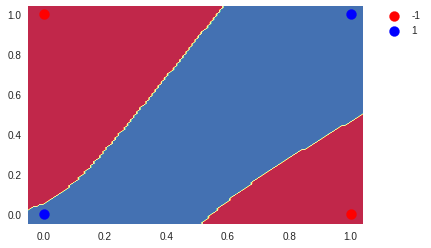

In [0]:
predictNoise(0.5, x, y_oneHot)

Loss after iteration 0: 1.496709
Loss after iteration 1000: 0.619825
Loss after iteration 2000: 0.188826
Loss after iteration 3000: 0.133385
Loss after iteration 4000: 0.111571
Loss after iteration 5000: 0.091438
Loss after iteration 6000: 0.072552
Loss after iteration 7000: 0.059793
Loss after iteration 8000: 0.051445
Loss after iteration 9000: 0.046038
Loss after iteration 10000: 0.042742
Loss after iteration 11000: 0.040917
Loss after iteration 12000: 0.040007
Loss after iteration 13000: 0.039596
Loss after iteration 14000: 0.039423
Loss after iteration 15000: 0.039305
Loss after iteration 16000: 0.039076
Loss after iteration 17000: 0.038533
Loss after iteration 18000: 0.037372
Loss after iteration 19000: 0.035077


{'W1': array([[ 2.57967255,  1.68779429,  0.50498984,  1.18396617],
        [ 3.9583194 , -2.48824948,  1.1998169 , -0.27822215]]),
 'W2': array([[-3.66200386,  0.87680397,  0.68314885,  5.02603205],
        [-0.16448437,  1.74266061, -0.18708417,  4.07935486],
        [-0.18711341, -2.58727584, -1.05140758, -5.47461981],
        [-6.31304902,  3.67352959,  2.37525736, -1.99978325]]),
 'W3': array([[ 6.1174757 , -5.83716515],
        [ 3.40557823, -4.00658471],
        [ 3.05908035, -2.53708935],
        [-6.88727605,  7.24627279]]),
 'b1': array([[-0.19158734, -0.53927805, -0.6731618 ,  0.0261806 ]]),
 'b2': array([[-0.06766133, -0.183037  , -0.05897677, -0.14283979]]),
 'b3': array([[-0.10633233, -0.05376902]])}

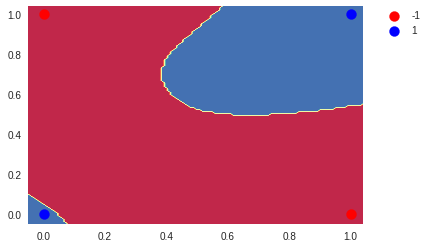

In [0]:
predictNoise(1, x, y_oneHot)

Loss after iteration 0: 1.498131
Loss after iteration 1000: 1.020609
Loss after iteration 2000: 0.327589
Loss after iteration 3000: 0.250954
Loss after iteration 4000: 0.197340
Loss after iteration 5000: 0.153930
Loss after iteration 6000: 0.116372
Loss after iteration 7000: 0.114540
Loss after iteration 8000: 0.111909
Loss after iteration 9000: 0.108400
Loss after iteration 10000: 0.120068
Loss after iteration 11000: 0.109378
Loss after iteration 12000: 0.086969
Loss after iteration 13000: 0.066394
Loss after iteration 14000: 0.051310
Loss after iteration 15000: 0.040745
Loss after iteration 16000: 0.033263
Loss after iteration 17000: 0.027822
Loss after iteration 18000: 0.023751
Loss after iteration 19000: 0.020623


{'W1': array([[ 2.15591283,  2.49366457,  2.30334391,  7.1116475 ],
        [ 3.176012  , -2.4115112 , -0.79141287,  0.66975641]]),
 'W2': array([[-0.69851845,  2.92245297,  3.89184449,  5.27619532],
        [-5.74107924, -1.09561057,  4.38707021,  0.94271463],
        [ 7.92270455,  0.64840656, -5.30830109, -1.07521706],
        [-6.1037745 ,  2.02512564,  2.8372471 , -0.74171726]]),
 'W3': array([[ 6.89915538, -6.92258649],
        [ 1.31337499, -1.34283905],
        [ 5.84244074, -5.76628933],
        [-7.00526419,  6.90610576]]),
 'b1': array([[-0.37116973, -0.34404188,  0.02733156,  0.29755003]]),
 'b2': array([[ 0.4046208 , -0.1149853 , -0.25654455,  0.77010622]]),
 'b3': array([[-0.41458486,  0.34224716]])}

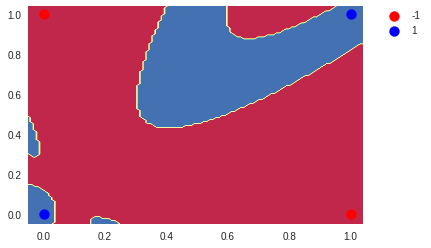

In [0]:
predictNoise(2, x, y_oneHot)